Comprehensive Autoimmune Disorder Dataset - Exploratory Data Analysis - Data understanding and cleaning

The dataset was downloaded from Kaggle website: https://www.kaggle.com/datasets/abdullahragheb/all-autoimmune-disorder-10k/data

In [29]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

Data aquisition

In [3]:
# Connection to database
db_name = 'db_autoimmune_disorders.db'
conn = sqlite3.connect(db_name)

# Import data to DataFrame
query = "SELECT t.*,d.* FROM tbl_all_research_results t LEFT JOIN tbl_disorders_description d ON t.Diagnosis = d.Diseases_eng;"
df= pd.read_sql_query(query, conn)


# close connection
conn.close()

Setting global parameters for Pandas, Matplotlib and Seaborn libraries

In [4]:
# Pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Matplotlib

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


In [6]:
# Seaborn

sns.set_style('ticks')
sns.set_palette('husl')
sns.despine()

<Figure size 600x400 with 0 Axes>

Checking data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            12510 non-null  int64  
 1   Age                                   12510 non-null  object 
 2   Gender                                12510 non-null  object 
 3   Diagnosis                             12510 non-null  object 
 4   Sickness_Duration_Months              12510 non-null  int64  
 5   RBC_Count                             12510 non-null  object 
 6   Hemoglobin                            12510 non-null  object 
 7   Hematocrit                            12510 non-null  object 
 8   MCV                                   12510 non-null  object 
 9   MCH                                   12510 non-null  object 
 10  MCHC                                  12510 non-null  float64
 11  RDW            

First look at the dataset to check if data types are correct

In [8]:
df.head()

,Patient_ID,Age,Gender,Diagnosis,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General unwell feeling,Joint pain,Anti_dsDNA,Anti_enterocyte_antibodies,anti_LKM1,Anti_RNP,ASCA,Anti_Ro_SSA,Anti_CBir1,Anti_BP230,Anti_tTG,DGP,Anti_BP180,ASMA,Anti_IF,IgG_IgE_receptor,Anti_SRP,Anti_desmoglein_3,Anti_La_SSB,Anti_Jo1,ANCA,anti_centromere,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_TIF1,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID,Diseases_eng,Diseases_pl,Diseases_group,Description_eng,Description_pl
0,1,65,Female,Linear IgA disease,26,3.54,13.18,44.35,99.85,31.8,33.12,12.52,2.08,8278,72.25,19.80,9.26,4.02,1.08,429117,8.08,1,1.50,1.81,40,1.32,0.49,3.10,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,Linear IgA disease,Linijna choroba IgA,Skin and Mucosal Diseases,Linear IgA disease is a rare autoimmune disord...,Linijna choroba IgA to rzadkie zaburzenie auto...
1,2,61,Male,Dermatomyositis,106,4.97,14.73,42.39,94.86,29.94,31.07,15.15,1.21,8592,56.73,42.68,2.66,1.67,1.16,487184,8.92,1,1.76,1.08,23,0.40,0.17,2.73,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,Dermatomyositis,Dermatomyositis,Musculoskeletal Diseases,Dermatomyositis is an inflammatory disease cha...,Dermatomyositis to choroba zapalna charakteryz...
2,3,42,Male,Ord's thyroiditis,6,3.91,13.66,42.41,88.26,29.43,35.61,15.52,2.68,8719,50.92,31.21,6.96,4.32,1.07,499962,7.70,1,2.49,1.42,44,0.95,0.26,1.02,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ord's thyroiditis,Zapalenie tarczycy Orda,Thyroid and Endocrine Diseases,Ord's thyroiditis is a rare form of thyroiditi...,Zapalenie tarczycy Orda to rzadka forma zapale...
3,4,45,Female,Restless legs syndrome,11,4.57,14.96,40.1,85.95,27.42,33.93,12.14,1.79,7698,41.20,33.60,6.54,3.12,0.72,129793,10.95,1,0.75,1.05,25,1.06,0.26,5.45,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,Restless legs syndrome,Zespół niespokojnych nóg,Neurological Diseases,Restless legs syndrome is a condition that cau...,"Zespół niespokojnych nóg to stan, który powodu..."
4,5,78,Female,Autoimmune polyendocrine syndrome type 2 (APS2),30,4.88,11.21,37.58,93.16,29.87,31.29,15.65,1.42,9755,45.82,42.57,3.05,4.60,1.40,467390,10.51,1,0.76,1.14,42,0.73,0.25,1.05,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,Autoimmune polyendocrine syndrome type 2 (APS2),Zespół poliendokrynny autoimmunologiczny typu ...,Thyroid and Endocrine Diseases,Autoimmune polyendocrine syndrome type 2 (APS2...,Autoimmunologiczny zespół poliendokrynny typu ...


In [9]:
df.tail(10)

,Patient_ID,Age,Gender,Diagnosis,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General unwell feeling,Joint pain,Anti_dsDNA,Anti_enterocyte_antibodies,anti_LKM1,Anti_RNP,ASCA,Anti_Ro_SSA,Anti_CBir1,Anti_BP230,Anti_tTG,DGP,Anti_BP180,ASMA,Anti_IF,IgG_IgE_receptor,Anti_SRP,Anti_desmoglein_3,Anti_La_SSB,Anti_Jo1,ANCA,anti_centromere,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_TIF1,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID,Diseases_eng,Diseases_pl,Diseases_group,Description_eng,Description_pl
12500,12501,33,,Normal,0,5.09,,46.63,81.99,27.96,35.77,13.61,,10383,47.08,30.12,5.15,1.18,0.93,193520,9.04,0,1.27,0.4,0,0.89,0.29,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,Normal,Normalne,Normal,"Normal indicates no pathological conditions, r...","Norma oznacza brak patologii, co odzwierciedla..."
12501,12502,54,Female,Normal,0,5.09,16.65,,81.99,27.96,35.77,13.61,1.39,,47.08,30.12,5.15,1.18,0.93,193520,9.04,0,1.27,0.4,0,0.89,0.29,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,Normal,Normalne,Normal,"Normal indicates no pathological conditions, r...","Norma oznacza brak patologii, co odzwierciedla..."
12502,12503,,Male,Normal,0,5.09,,46.63,81.99,27.96,35.77,13.61,,10383,47.08,30.12,5.15,1.18,0.93,193520,9.04,0,1.27,0.4,0,0.89,0.29,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,Normal,Normalne,Normal,"Normal indicates no pathological conditions, r...","Norma oznacza brak patologii, co odzwierciedla..."
12503,12504,,Male,Normal,0,5.09,16.65,,81.99,27.96,35.77,,1.39,10383,47.08,30.12,5.15,1.18,0.93,193520,9.04,0,1.27,0.4,0,0.89,0.29,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,Normal,Normalne,Normal,"Normal indicates no pathological conditions, r...","Norma oznacza brak patologii, co odzwierciedla..."
12504,12505,23,Female,Normal,0,5.09,16.65,46.63,,27.96,35.77,13.61,,10383,47.08,30.12,5.15,1.18,0.93,193520,9.04,0,1.27,0.4,0,0.89,0.29,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,Normal,Normalne,Normal,"Normal indicates no pathological conditions, r...","Norma oznacza brak patologii, co odzwierciedla..."
12505,12506,43,,Normal,0,5.09,16.65,46.63,81.99,,35.77,13.61,1.39,,47.08,30.12,5.15,1.18,0.93,193520,9.04,0,1.27,0.4,0,0.89,0.29,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,Normal,Normalne,Normal,"Normal indicates no pathological conditions, r...","Norma oznacza brak patologii, co odzwierciedla..."
12506,12507,,Female,Normal,0,5.09,16.65,46.63,81.99,,35.77,13.61,,10383,47.08,30.12,5.15,1.18,0.93,193520,9.04,0,1.27,0.4,0,0.89,0.29,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,Normal,Normalne,Normal,"Normal indicates no pathological conditions, r...","Norma oznacza brak patologii, co odzwierciedla..."
12507,12508,28,Male,Normal,0,5.09,16.65,46.63,,27.96,35.77,,1.39,10383,47.08,30.12,5.15,1.18,0.93,193520,9.04,0,1.27,0.4,0,0.89,0.29,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,Normal,Normalne,Norma

Some data types are incorrect so they need to be changed.
To sucessfully do that, first we need to replace empty strings with 'NA' values

In [10]:
# Converting into intiger types

to_int_columns = ['Age', 'WBC_Count', 'Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']

for column in to_int_columns:
    df[column] = df[column].replace('', pd.NA)
    df[column] = df[column].astype('Int64')

# Converting into float types

to_float_columns = ['RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH', 'RDW', 'Reticulocyte_Count']

for column in to_float_columns:
    df[column] = df[column].replace('', pd.NA)
    df[column] = df[column].astype('Float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            12510 non-null  int64  
 1   Age                                   12506 non-null  Int64  
 2   Gender                                12510 non-null  object 
 3   Diagnosis                             12510 non-null  object 
 4   Sickness_Duration_Months              12510 non-null  int64  
 5   RBC_Count                             12509 non-null  Float64
 6   Hemoglobin                            12508 non-null  Float64
 7   Hematocrit                            12508 non-null  Float64
 8   MCV                                   12507 non-null  Float64
 9   MCH                                   12506 non-null  Float64
 10  MCHC                                  12510 non-null  float64
 11  RDW            

In [12]:
df.head()

,Patient_ID,Age,Gender,Diagnosis,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General unwell feeling,Joint pain,Anti_dsDNA,Anti_enterocyte_antibodies,anti_LKM1,Anti_RNP,ASCA,Anti_Ro_SSA,Anti_CBir1,Anti_BP230,Anti_tTG,DGP,Anti_BP180,ASMA,Anti_IF,IgG_IgE_receptor,Anti_SRP,Anti_desmoglein_3,Anti_La_SSB,Anti_Jo1,ANCA,anti_centromere,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_TIF1,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID,Diseases_eng,Diseases_pl,Diseases_group,Description_eng,Description_pl
0,1,65,Female,Linear IgA disease,26,3.54,13.18,44.35,99.85,31.8,33.12,12.52,2.08,8278,72.25,19.80,9.26,4.02,1.08,429117,8.08,1,1.50,1.81,40,1.32,0.49,3.10,1,1,0,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,Linear IgA disease,Linijna choroba IgA,Skin and Mucosal Diseases,Linear IgA disease is a rare autoimmune disord...,Linijna choroba IgA to rzadkie zaburzenie auto...
1,2,61,Male,Dermatomyositis,106,4.97,14.73,42.39,94.86,29.94,31.07,15.15,1.21,8592,56.73,42.68,2.66,1.67,1.16,487184,8.92,1,1.76,1.08,23,0.40,0.17,2.73,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,Dermatomyositis,Dermatomyositis,Musculoskeletal Diseases,Dermatomyositis is an inflammatory disease cha...,Dermatomyositis to choroba zapalna charakteryz...
2,3,42,Male,Ord's thyroiditis,6,3.91,13.66,42.41,88.26,29.43,35.61,15.52,2.68,8719,50.92,31.21,6.96,4.32,1.07,499962,7.70,1,2.49,1.42,44,0.95,0.26,1.02,1,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ord's thyroiditis,Zapalenie tarczycy Orda,Thyroid and Endocrine Diseases,Ord's thyroiditis is a rare form of thyroiditi...,Zapalenie tarczycy Orda to rzadka forma zapale...
3,4,45,Female,Restless legs syndrome,11,4.57,14.96,40.1,85.95,27.42,33.93,12.14,1.79,7698,41.20,33.60,6.54,3.12,0.72,129793,10.95,1,0.75,1.05,25,1.06,0.26,5.45,0,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,Restless legs syndrome,Zespół niespokojnych nóg,Neurological Diseases,Restless legs syndrome is a condition that cau...,"Zespół niespokojnych nóg to stan, który powodu..."
4,5,78,Female,Autoimmune polyendocrine syndrome type 2 (APS2),30,4.88,11.21,37.58,93.16,29.87,31.29,15.65,1.42,9755,45.82,42.57,3.05,4.60,1.40,467390,10.51,1,0.76,1.14,42,0.73,0.25,1.05,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,Autoimmune polyendocrine syndrome type 2 (APS2),Zespół poliendokrynny autoimmunologiczny typu ...,Thyroid and Endocrine Diseases,Autoimmune polyendocrine syndrome type 2 (APS2...,Autoimmunologiczny zespół poliendokrynny typu ...


After repleacing empty strings with 'NA' values missing values analysis can be conducted

In [13]:
df.isna().sum()

Patient_ID                                 0
Age                                        4
Gender                                     0
Diagnosis                                  0
Sickness_Duration_Months                   0
RBC_Count                                  1
Hemoglobin                                 2
Hematocrit                                 2
MCV                                        3
MCH                                        4
MCHC                                       0
RDW                                        4
Reticulocyte_Count                         5
WBC_Count                                  2
Neutrophils                                0
Lymphocytes                                0
Monocytes                                  0
Eosinophils                                0
Basophils                                  0
PLT_Count                                  0
MPV                                        0
ANA                                        0
Esbach    

Missing data is present in 9 variables (columns). Due to the small amount of missing values, all rows containing missing values in these variables will be removed.
Additionally, 7 variables have as many as 2510 missing values. However, these missing values occur in cases of healthy individuals, therefore these patients will not be removed from the dataset.

In [ ]:
df.dropna(subset=['Age', 'RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH', 'RDW', 'Reticulocyte_Count', 'WBC_Count'])

In [ ]:
df.isna().sum

Duplicates analysis

In [14]:
df.duplicated().sum()

0

Frequensies for categorical atributes (object types) except 'Description...' columns

In [19]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns = object_columns.drop(['Description_eng', 'Description_pl'], errors='ignore')

for col in object_columns:
    print(f'Frequency distribution for column: {col}')
    print(df[col].value_counts())
    print('\n')

Frequency distribution for column: Gender
Gender
Male      6319
Female    6189
             2
Name: count, dtype: int64


Frequency distribution for column: Diagnosis
Diagnosis
Normal                                                  2510
Endometriosis                                            184
Dermatomyositis                                          183
Autoimmune oophoritis                                    170
Autoimmune orchitis                                      162
Myasthenia gravis                                        149
Dermatitis herpetiformis                                 101
Antiphospholipid syndrome                                101
Hidradenitis suppurativa                                 101
Vasculitis                                               101
Morphea                                                   99
Immune thrombocytopenia                                   99
Chronic inflammatory demyelinating polyneuropathy         98
Interstitial lung disease     

Descriptive statistics for numerical atributes

In [15]:
df.describe()

,Patient_ID,Age,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General unwell feeling,Joint pain,Anti_dsDNA,Anti_enterocyte_antibodies,anti_LKM1,Anti_RNP,ASCA,Anti_Ro_SSA,Anti_CBir1,Anti_BP230,Anti_tTG,DGP,Anti_BP180,ASMA,Anti_IF,IgG_IgE_receptor,Anti_SRP,Anti_desmoglein_3,Anti_La_SSB,Anti_Jo1,ANCA,anti_centromere,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_TIF1,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID
count,12510.000000,12506.0,12510.000000,12509.0,12508.0,12508.0,12507.0,12506.0,12510.000000,12506.0,12505.0,12508.0,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.0,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000
mean,6255.500000,49.751239,47.926619,4.450182,13.126594,41.562665,90.17137,29.021273,33.607483,13.788116,1.819394,7921.788295,53.137766,30.003090,5.759954,2.904126,0.947830,298763.973781,9.496764,0.569065,1.552276,1.118624,25.226059,0.962562,0.336795,4.445804,0.5024,0.4988,0.4918,0.5,0.4897,0.4974,0.499,0.400959,0.389768,0.393365,0.395763,0.390568,0.390088,0.403597,0.397682,0.394245,0.395604,0.014788,0.006395,0.006715,0.007434,0.012710,0.007434,0.006475,0.020224,0.0,0.006875,0.020224,0.006715,0.006795,0.007674,0.014628,0.006954,0.007434,0.014628,0.006475,0.006155,0.006954,0.006875,0.007114,0.006555,0.014628,0.007034,0.006475,0.006235,0.014948,0.006155,0.014628,0.006795,0.006555,0.014788,68.785452
std,3611.470268,17.741741,39.042279,0.57299,1.843583,3.319657,8.15053,1.627855,1.414202,1.175684,0.643637,2216.333307,12.284568,8.196682,2.235503,1.115946,0.283033,110208.975124,1.373692,0.495227,0.771155,0.479457,13.385013,0.287787,0.132636,3.078746,0.500019,0.500024,0.499958,0.500025,0.499919,0.500018,0.500024,0.490112,0.487717,0.488516,0.489034,0.487897,0.487789,0.490638,0.489439,0.488707,0.488999,0.120709,0.079715,0.081671,0.085903,0.112024,0.085903,0.080209,0.140771,0.0,0.082630,0.140771,0.081671,0.082152,0.087267,0.120064,0.083106,0.085903,0.120064,0.080209,0.078216,0.083106,0.082630,0.084049,0.080699,0.120064,0.083579,0.080209,0.078719,0.121350,0.078216,0.120064,0.082152,0.080699,0.120709,38.180266
min,1.000000,18.0,0.000000,3.5,10.0,36.0,75.01,26.0,31.000000,11.5,0.5,4000.0,30.000000,15.000000,2.000000,1.000000,0.500000,100031.000000,7.000000,0.000000,0.100000,0.200000,0.000000,0.400000,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3128.250000,34.0,8.000000,3.98,11.61,38.8875,83.37,27.69,32

Visualizations to check variable distribution and outliers/ incorect data values

Histograms for numerical atributes (float data types)

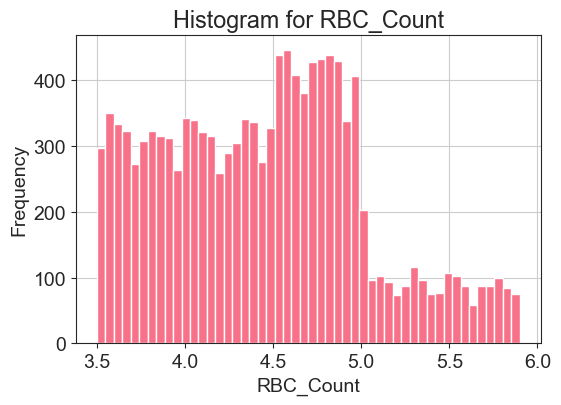

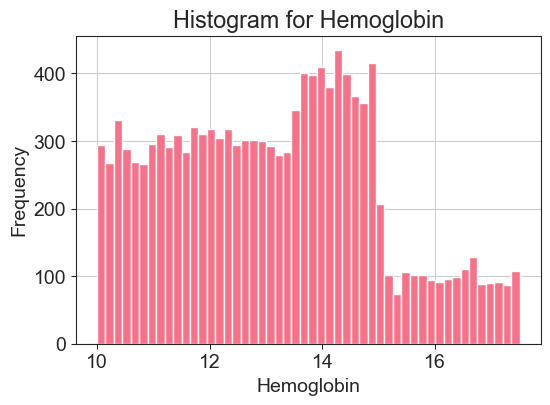

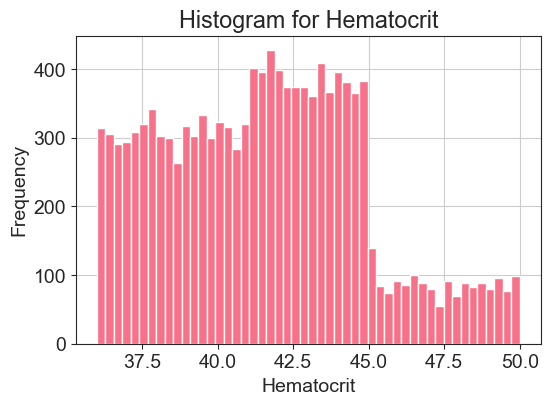

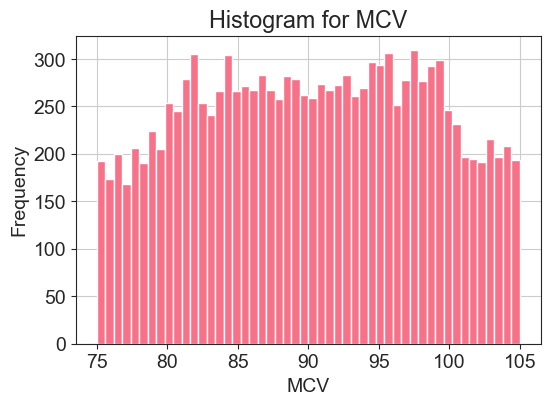

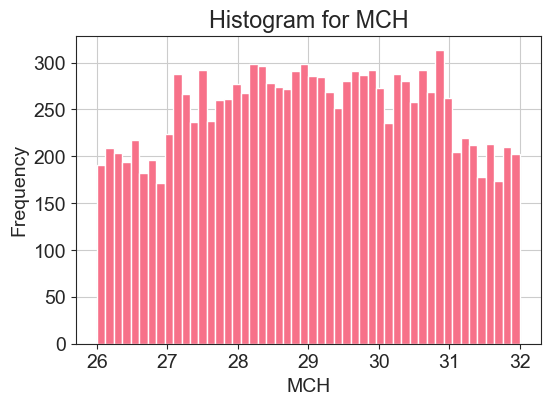

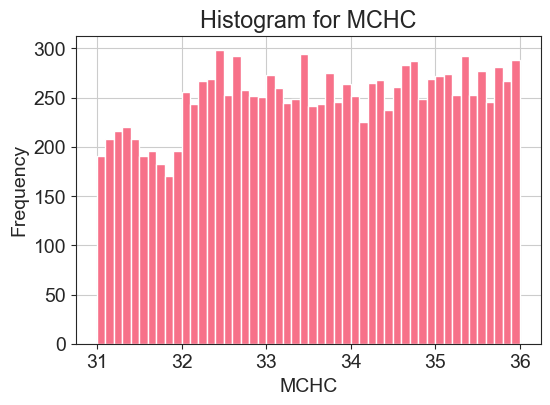

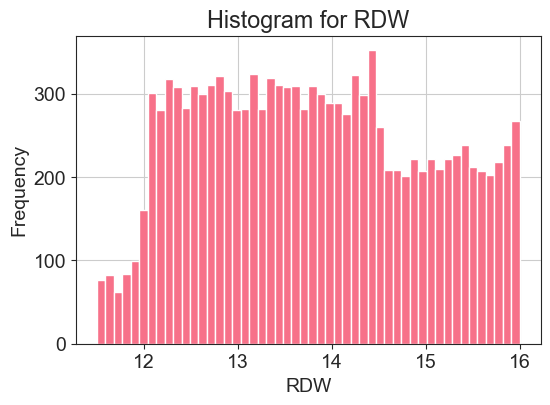

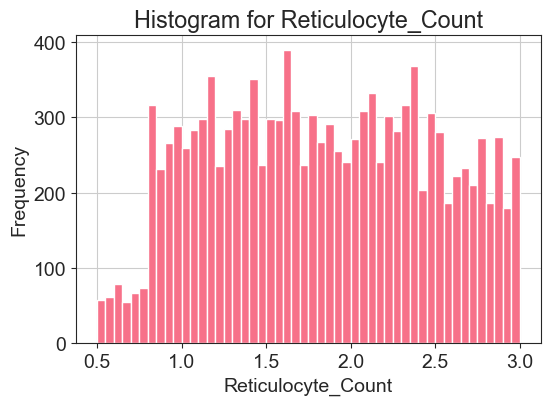

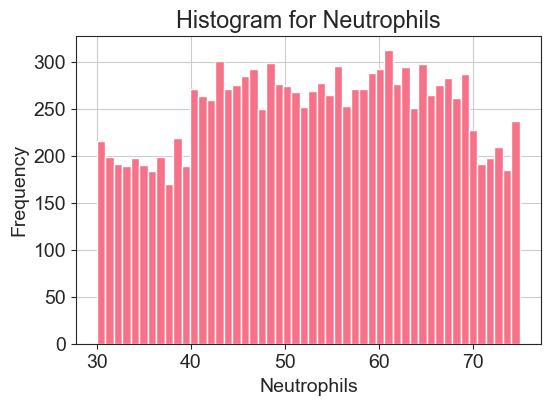

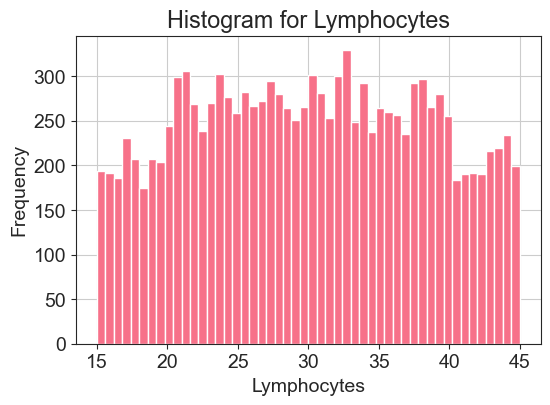

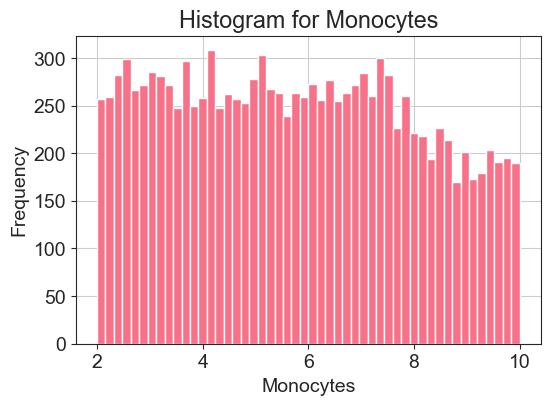

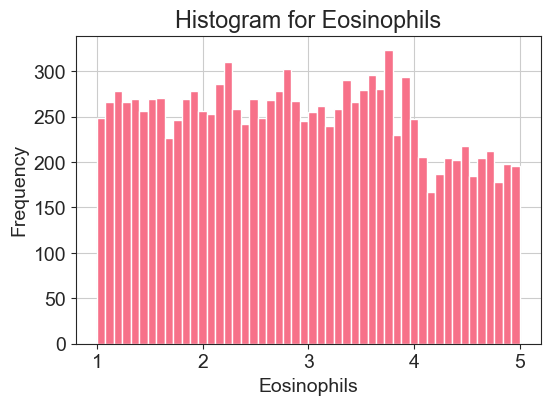

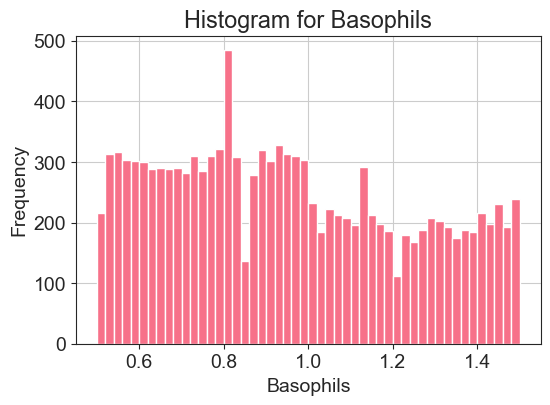

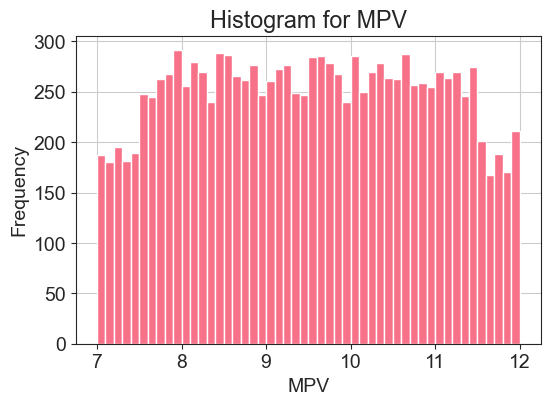

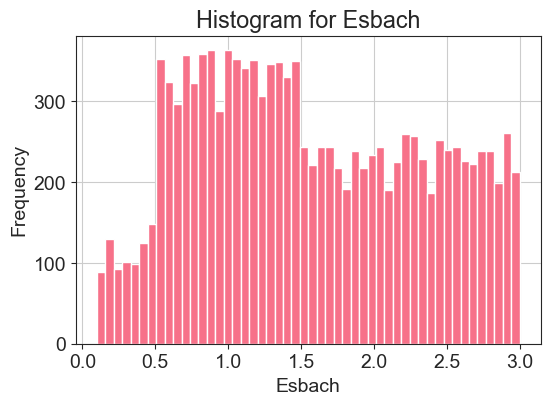

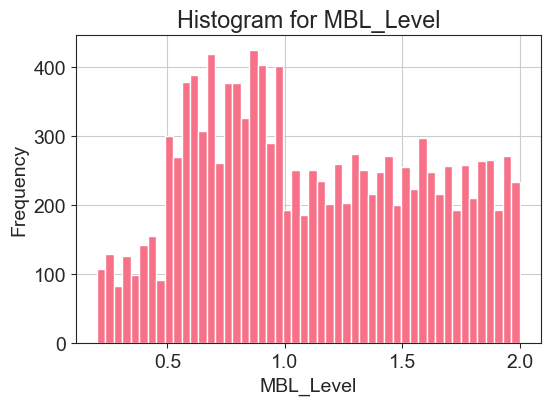

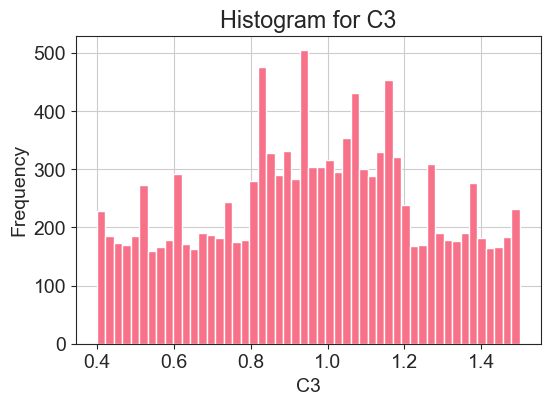

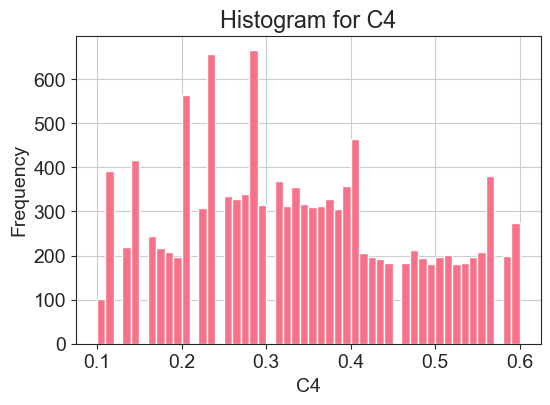

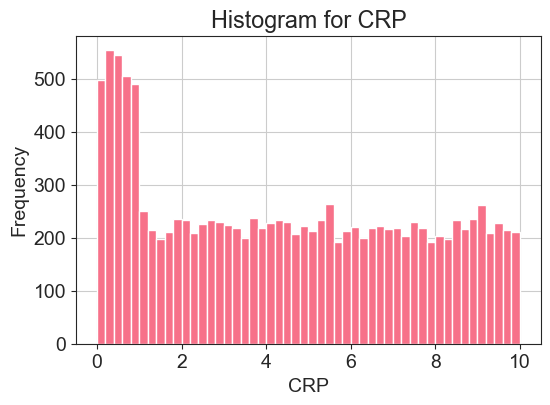

In [21]:
float_columns = df.select_dtypes(include=['Float64', 'float64']).columns

for col in float_columns:
    df[col].hist(bins=50)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Histogram for Age variable

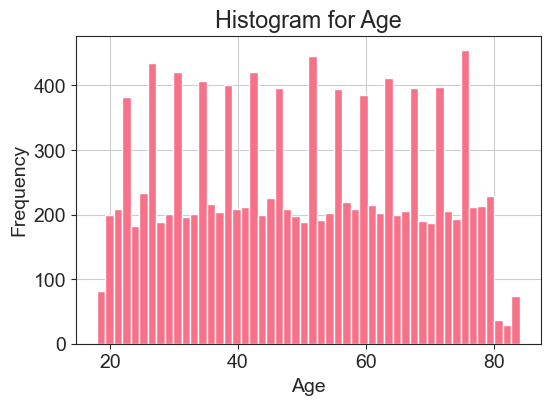

In [26]:
df['Age'].hist(bins=50)
plt.title(f'Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

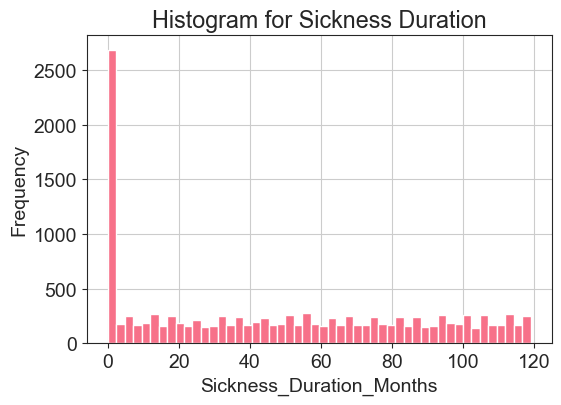

In [27]:
df['Sickness_Duration_Months'].hist(bins=50)
plt.title(f'Histogram for Sickness Duration')
plt.xlabel('Sickness_Duration_Months')
plt.ylabel('Frequency')
plt.show()

Bar plots for intiger data types (numerical with few values)

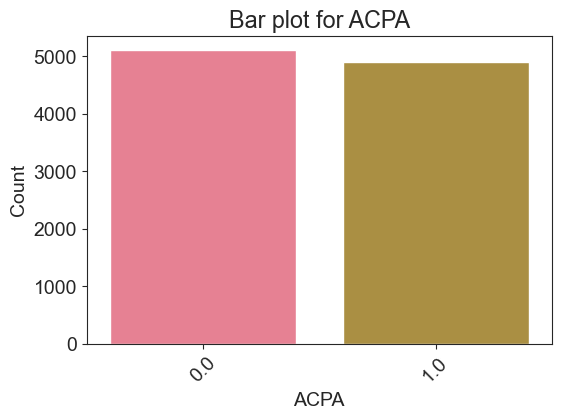

In [35]:
sns.countplot(x='Anti-TPO', data=df)
plt.title(f'Bar plot for ACPA')
plt.xlabel('ACPA')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

*Tego jeszcze nie zdążyłem zrobić - muszę pętlę stworzyć, która będzie iterowała po liście zmiennych typu int i wykonywała wykresy słupkowe dla każdej takiej zmiennej*

Outliers and incorect data values detection with Z-score and IQR method

*Tego też jeszcze nie zdążyłem zrobić*